# Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
# Importing all the necessary libraries
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
pd.pandas.set_option("display.max_columns",None)

In [6]:
# Loading the Dataset

train = pd.read_csv("D:/Zaid/Credit_card/creditcard.csv")
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
train.shape

(284807, 31)

In [9]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [15]:
train.isnull().values.any()

False

In [17]:
train.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

# 1. Visualizing the Target feature

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

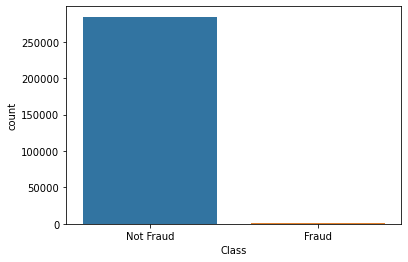

In [22]:
g = sns.countplot(train['Class'])
g.set_xticklabels(['Not Fraud', 'Fraud'])

# This plot shows it is highly unbalanced as most of the features are non_fraud

# 2. Visualizing The Amount feature

<AxesSubplot:xlabel='Amount', ylabel='Count'>

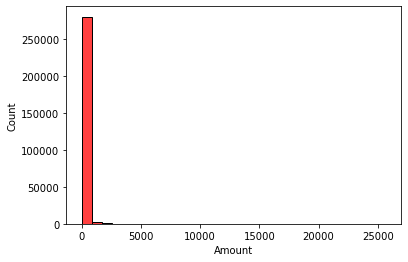

In [25]:
sns.histplot(train['Amount'],bins=30,color='red')

In [26]:
train['log_amount'] = train['Amount'].apply(lambda x: np.log(x+0.01))

<AxesSubplot:xlabel='log_amount', ylabel='Count'>

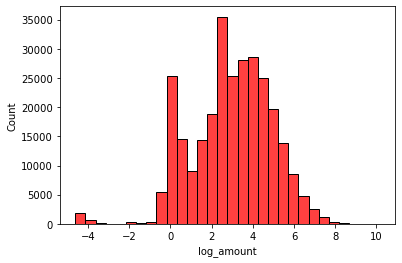

In [29]:
sns.histplot(train['log_amount'],bins = 30, color = 'red')

# 3. Visualizing The Outliers in amount feature

Text(0.5, 1.0, 'class vs log_amount')

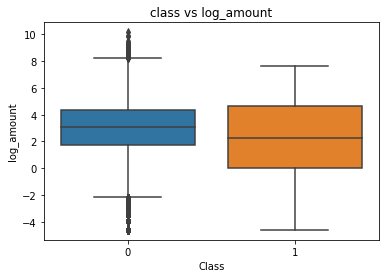

In [38]:
outlier =sns.boxplot(x =train['Class'], y=train['log_amount'], data=train)
outlier.set_title('class vs log_amount')


# 4. Scaling the data

As Robust scalers are less prone to outliers Hence i'm using it here for scaling the features.

In [44]:
scaler = RobustScaler()
train['scaled_Amount']= scaler.fit_transform(train['log_amount'].values.reshape(-1,1))
train['scaled_time']= scaler.fit_transform(train['Time'].values.reshape(-1,1))

<AxesSubplot:xlabel='scaled_Amount', ylabel='Count'>

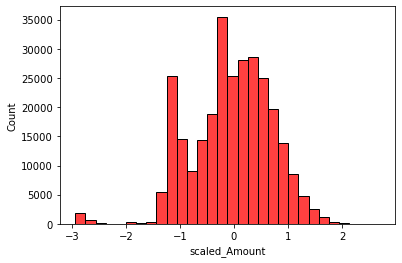

In [46]:
sns.histplot(train['scaled_Amount'],bins=30,color='red')

<AxesSubplot:xlabel='scaled_time', ylabel='Count'>

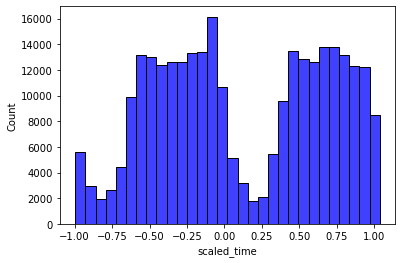

In [48]:
sns.histplot(train['scaled_time'],bins=30,color='blue')

# 5. Preparing the Dataset for analysis

In [54]:
train['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [57]:
class_0 = train[train['Class']==0]
class_1 = train[train['Class']==1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 36)
class 1: (492, 36)


In [58]:
fraud_df = train[train['Class']==1]
non_fraud_df = train[train['Class']==0]
fraud_df.shape , non_fraud_df.shape

((492, 36), (284315, 36))

In [61]:
train.drop(['Time','Amount','log_amount'], axis=1, inplace=True)

In [62]:
scaled_amount = train['scaled_Amount']
scaled_time = train['scaled_time']

train.drop(['scaled_Amount', 'scaled_time'], axis=1, inplace=True)
train.insert(0, 'scaled_Amount', scaled_amount)
train.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

train.head()

,scaled_Amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,sclaed_Amount,sclaed_time
0,0.731127,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.731127,-0.994983
1,-0.800391,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.800391,-0.994983
2,1.085310,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.085310,-0.994972
3,0.657947,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.657947,-0.994972
4,0.441346,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.441346,-0.994960


# 5. Heatmap

<AxesSubplot:>

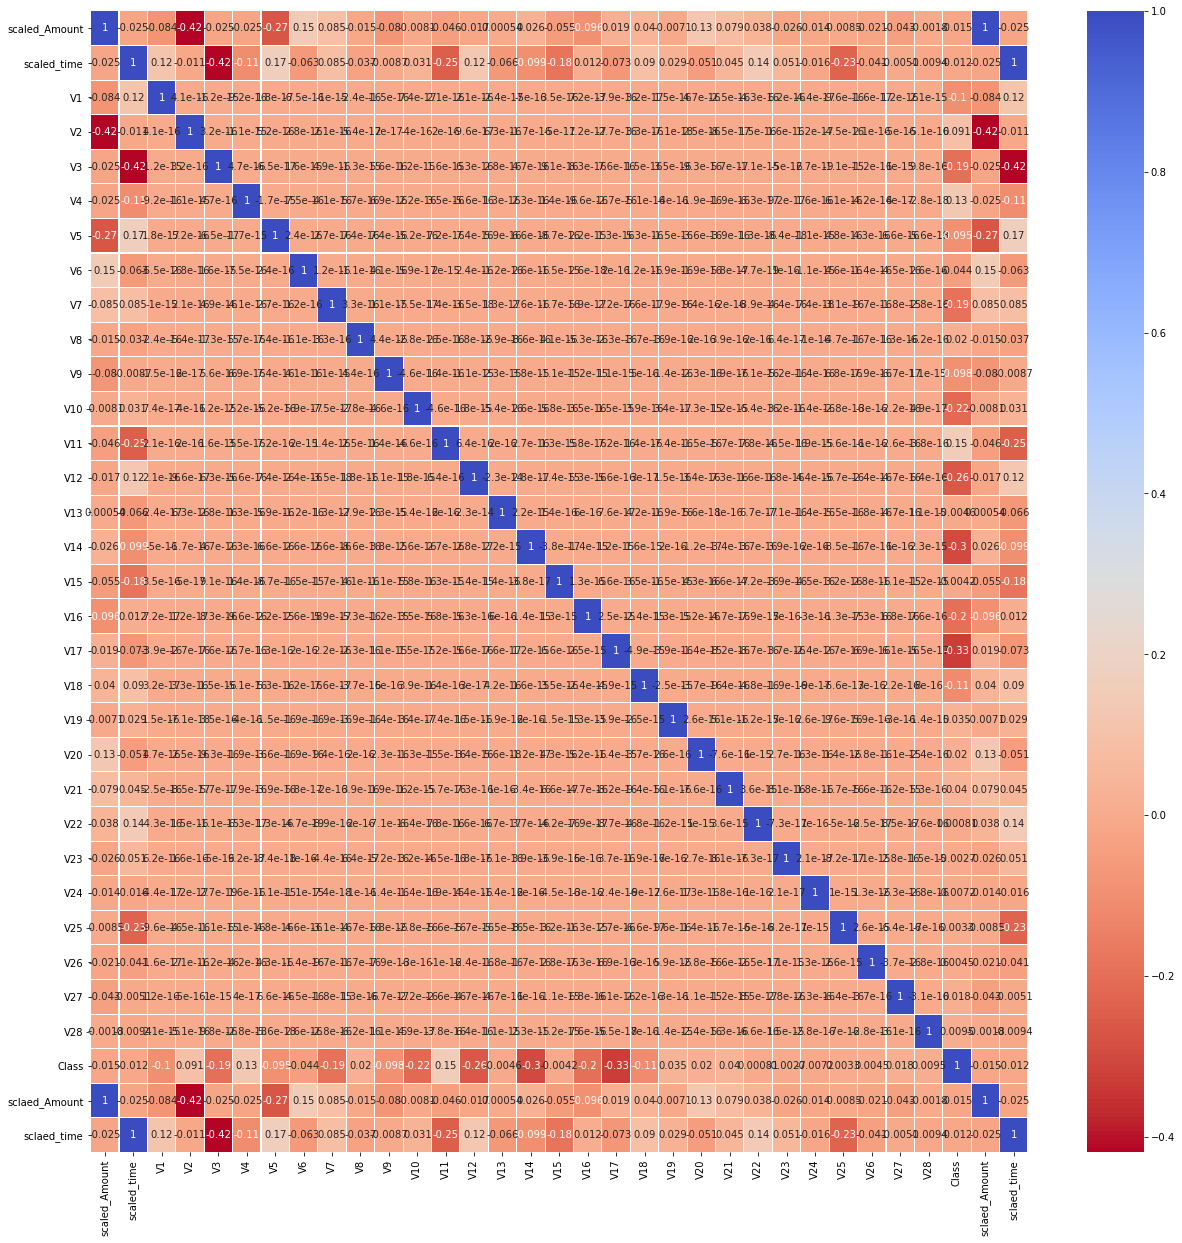

In [78]:
plt.figure(figsize=(21,21))
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0,cmap='coolwarm_r',annot=True)

This shows: Negatively Correlated= V3,V7,V10,V12,V14,V17 and Positively Correlated= V2,V4,V11,V19 Feature

# 5. Handling Unbalanced Dataset

In [79]:
y=train['Class']
train.drop(['Class'],axis=1,inplace=True)

In [80]:
# train test split of the dataset
x_train,x_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

In [88]:
# !pip install imbalanced-learn
#!pip install cluster-over-sampling
import imblearn

from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from clover.over_sampling import ClusterOverSampler
smote = SMOTE(random_state=42)
kmeans = KMeans(n_clusters=50, random_state=42)
kmeans_smote = ClusterOverSampler(oversampler=smote, clusterer=kmeans)


In [90]:
# smote
from collections import Counter
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_train, y_train)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_smote))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<AxesSubplot:xlabel='Class', ylabel='count'>

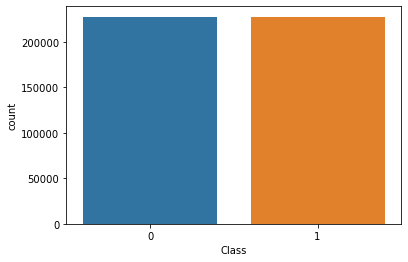

In [92]:
sns.countplot(y_smote)

In [93]:
# Cluster Over Sampling
x_cos, y_cos = kmeans_smote.fit_resample(x_train, y_train)
print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_cos))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 227451, 1: 227451})


<AxesSubplot:xlabel='Class', ylabel='count'>

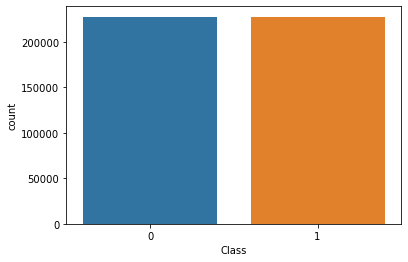

In [94]:
sns.countplot(y_cos)

# 6. Model Building

Logistic Regression With SMOTE

In [95]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_1=LogisticRegression()
model_1.fit(x_smote,y_smote)
pred_1=model_1.predict(x_test)
acc_1 = accuracy_score(y_test, pred_1)
con_mat = confusion_matrix(y_test, pred_1)
clf_report = classification_report(y_test, pred_1)
print(f"Accuracy Score of Logistic Regression : {acc_1}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9751237667216741
Confusion Matrix : 
[[55455  1409]
 [    8    90]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



Logistic Regression With ClusterOverSampler

In [97]:
# cluster based sampling
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score
model_2=LogisticRegression()
model_2.fit(x_cos,y_cos)
pred_2=model_2.predict(x_test)
acc_2 = accuracy_score(y_test, pred_2)
con_mat = confusion_matrix(y_test, pred_2)
clf_report = classification_report(y_test, pred_2)
print(f"Accuracy Score of Logistic Regression : {acc_2}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression : 0.9989993328885924
Confusion Matrix : 
[[56840    24]
 [   33    65]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.66      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.83      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# Decision Tree Classifier with SMOTE

In [99]:
model_3=DecisionTreeClassifier()
model_3.fit(x_smote,y_smote)
pred_3=model_3.predict(x_test)
acc_3 = accuracy_score(y_test, pred_3)
con_mat = confusion_matrix(y_test, pred_3)
clf_report = classification_report(y_test, pred_3)
print(f"Accuracy Score of Decision Tree : {acc_3}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.997471998876444
Confusion Matrix : 
[[56742   122]
 [   22    76]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.38      0.78      0.51        98

    accuracy                           1.00     56962
   macro avg       0.69      0.89      0.76     56962
weighted avg       1.00      1.00      1.00     56962



Decision Tree Classifier with COS

In [100]:
# decision Tree Classifier
model_4=DecisionTreeClassifier()
model_4.fit(x_cos,y_cos)
pred_4=model_4.predict(x_test)
acc_4 = accuracy_score(y_test, pred_4)
con_mat = confusion_matrix(y_test, pred_4)
clf_report = classification_report(y_test, pred_4)
print(f"Accuracy Score of Decision Tree : {acc_4}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree : 0.9992451107756047
Confusion Matrix : 
[[56838    26]
 [   17    81]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [102]:
model_5=RandomForestClassifier()
model_5.fit(x_smote,y_smote)
pred_5=model_5.predict(x_test)
acc_5 = accuracy_score(y_test, pred_5)
con_mat = confusion_matrix(y_test, pred_5)
clf_report = classification_report(y_test, pred_5)
print(f"Accuracy Score of Random Forest : {acc_5}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest : 0.9995084442259752
Confusion Matrix : 
[[56854    10]
 [   18    80]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.82      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [103]:
model_6=RandomForestClassifier()
model_6.fit(x_cos,y_cos)
pred_6=model_4.predict(x_test)
acc_6 = accuracy_score(y_test, pred_6)
con_mat = confusion_matrix(y_test, pred_6)
clf_report = classification_report(y_test, pred_6)
print(f"Accuracy Score of Random Forest : {acc_6}")
print(f"Confusion Matrix : \n{con_mat}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest : 0.9992451107756047
Confusion Matrix : 
[[56838    26]
 [   17    81]]
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.83      0.79        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [104]:
d = {'Technique': ['Logistic SMOTE','Logistic Clover','Decision Tree SMOTE','Decision Tree Clover', 'Random Forest SMOTE',
                  'Random Forest Clover'],
                   'Score': [acc_1,acc_2,acc_3,acc_4,acc_5,acc_6]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)
 
final_df.sort_values(by="Score",ascending=False)

,Technique,Score
4,Random Forest SMOTE,0.999508
3,Decision Tree Clover,0.999245
5,Random Forest Clover,0.999245
1,Logistic Clover,0.998859
2,Decision Tree SMOTE,0.997472
0,Logistic SMOTE,0.975124
